## CS 675 Midterm Project
#### Megan Resurreccion, Jimmy, Neha

In [486]:
## Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import graphviz
import plotly.express as px
from sklearn import metrics, neighbors, preprocessing, model_selection, datasets, svm, cluster, datasets, mixture, tree
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.metrics.cluster import completeness_score, homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances,cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:,.2f}'.format

In [487]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [488]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [489]:
train_df.shape

(1460, 81)

In [490]:
print(train_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Replace string values with numerical ones

In [491]:
train_df['LotFrontage'].fillna('NA',inplace=True)
train_df['LotFrontage'].fillna('Alley',inplace=True)
train_df['MasVnrType'].fillna('NA',inplace=True)
train_df['MasVnrArea'].fillna('NA',inplace=True)
train_df['BsmtQual'].fillna('NA',inplace=True)
train_df['BsmtCond'].fillna('NA',inplace=True)
train_df['BsmtExposure'].fillna('NA',inplace=True)
train_df['BsmtFinType1'].fillna('NA',inplace=True)
train_df['BsmtFinType2'].fillna('NA',inplace=True)
train_df['Electrical'].fillna('NA',inplace=True)
train_df['GarageType'].fillna('NA',inplace=True)
train_df['GarageYrBlt'].fillna('NA',inplace=True)
train_df['GarageFinish'].fillna('NA',inplace=True)
train_df['GarageQual'].fillna('NA',inplace=True)
train_df['GarageCond'].fillna('NA',inplace=True)
train_df['FireplaceQu'].fillna('NA',inplace=True)
train_df['PoolQC'].fillna('NA',inplace=True)
train_df['Fence'].fillna('NA',inplace=True)
train_df['MiscFeature'].fillna('NA',inplace=True)
train_df['Alley'].fillna('NA',inplace=True)

In [492]:
rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.BsmtQual = [rating[item] for item in train_df.BsmtQual]
train_df.BsmtCond = [rating[item] for item in train_df.BsmtCond]
train_df.KitchenQual = [rating[item] for item in train_df.KitchenQual]
train_df.HeatingQC = [rating[item] for item in train_df.HeatingQC]
train_df.FireplaceQu = [rating[item] for item in train_df.FireplaceQu]
train_df.PoolQC = [rating[item] for item in train_df.PoolQC]

In [493]:
pavement = {'Y': 1.0, 'P': 0.5, 'N': 0}
train_df.PavedDrive = [pavement[item] for item in train_df.PavedDrive]

In [494]:
function = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_df.Functional = [function[item] for item in train_df.Functional]


In [495]:
util = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
train_df.Utilities = [util[item] for item in train_df.Utilities]


In [496]:
bsmtex = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train_df.BsmtExposure = [bsmtex[item] for item in train_df.BsmtExposure]

In [497]:
air = {'Y': 1, 'N': 0}
train_df.CentralAir = [air[item] for item in train_df.CentralAir]

In [498]:
fen = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
train_df.Fence = [fen[item] for item in train_df.Fence]

New Feature 1: Average of OverallQual and OverallCond

In [499]:
train_df['OverallRating'] = ((train_df['OverallQual']+train_df['OverallCond'])/2)
train_df['OverallRating'].head()
train_df = train_df.drop(['OverallQual','OverallCond'],axis=1)

New Feature 2: Total Square Feet of 1st and 2nd Floors

In [500]:
train_df['TotalFloorSqFt'] = train_df['1stFlrSF']+train_df['2ndFlrSF']
train_df['TotalFloorSqFt'].head()
train_df = train_df.drop(['1stFlrSF','2ndFlrSF'],axis=1)

New Feature 3: Total Outdoor Porch and Deck Square Feet

In [501]:
train_df['TotalPorchDeckSqFt'] = (train_df['WoodDeckSF']+train_df['OpenPorchSF']
                                +train_df['EnclosedPorch']+train_df['3SsnPorch']
                                +train_df['ScreenPorch'])

train_df = train_df.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)


New Feature 4: Garage Overall Quality

In [502]:
garage = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.GarageQual = [garage[item] for item in train_df.GarageQual]
train_df.GarageCond = [garage[item] for item in train_df.GarageCond]

train_df['GarageOverall'] = ((train_df['GarageQual']+train_df['GarageCond'])/2)

train_df = train_df.drop(['GarageQual','GarageCond'],axis=1)

New Feature 5: Exterior Overall Quality

In [503]:
exterior = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.ExterQual = [exterior[item] for item in train_df.ExterQual]
train_df.ExterCond = [exterior[item] for item in train_df.ExterCond]

train_df['ExterOverall'] = ((train_df['ExterQual']+train_df['ExterCond'])/2)

train_df = train_df.drop(['ExterQual','ExterCond'],axis=1)

Drop some columns not planning on using

In [504]:
for col in train_df.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
PavedDrive
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
OverallRating
TotalFloorSqFt
TotalPorchDeckSqFt
GarageOverall
ExterOverall


Choose Features

In [505]:
train_target = train_df['SalePrice']

In [506]:
train_feats = train_df[['MSSubClass','LotArea','Utilities','OverallRating',
                       'YearBuilt','ExterOverall','BsmtQual','BsmtCond',
                       'BsmtExposure','TotalBsmtSF','HeatingQC','CentralAir',
                        'TotalFloorSqFt','GrLivArea','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars',
                        'GarageOverall','PavedDrive','TotalPorchDeckSqFt']]


In [507]:
train_feats.head(5)

,MSSubClass,LotArea,Utilities,OverallRating,YearBuilt,ExterOverall,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageOverall,PavedDrive,TotalPorchDeckSqFt
0,60,8450,4,6.00,2003,3.50,4,3,1,856,...,1710,4,8,8,0,0,2,3.00,1.00,61
1,20,9600,4,7.00,1976,3.00,4,3,4,1262,...,1262,3,6,8,1,3,2,3.00,1.00,298
2,60,11250,4,6.00,2001,3.50,4,3,2,920,...,1786,4,6,8,1,3,2,3.00,1.00,42
3,70,9550,4,6.00,1915,3.00,3,4,1,756,...,1717,4,7,8,1,4,3,3.00,1.00,307
4,60,14260,4,6.50,2000,3.50,4,3,3,1145,...,2198,4,9,8,1,3,3,3.00,1.00,276


Check for Variance

In [508]:
train_feats.var()

MSSubClass                1,789.34
LotArea              99,625,649.65
Utilities                     0.00
OverallRating                 0.72
YearBuilt                   912.22
ExterOverall                  0.11
BsmtQual                      0.77
BsmtCond                      0.30
BsmtExposure                  1.14
TotalBsmtSF             192,462.36
HeatingQC                     0.92
CentralAir                    0.06
TotalFloorSqFt          271,611.42
GrLivArea               276,129.63
KitchenQual                   0.44
TotRmsAbvGrd                  2.64
Functional                    0.45
Fireplaces                    0.42
FireplaceQu                   3.28
GarageCars                    0.56
GarageOverall                 0.51
PavedDrive                    0.06
TotalPorchDeckSqFt       24,541.13
dtype: float64

Drop Columns with Low Variance

In [509]:
train_feats = train_feats.drop(['MSSubClass','ExterOverall','BsmtExposure','TotalBsmtSF',
                               'Utilities','TotalFloorSqFt','GrLivArea','TotRmsAbvGrd','TotalPorchDeckSqFt'],axis=1)

In [510]:
train_feats.shape

(1460, 14)

Standardize Features with StandardScaler

In [511]:
scaler = StandardScaler()
scaler.fit(train_feats)
x_scale = scaler.transform(train_feats)
data_scale = pd.DataFrame(x_scale, columns=train_feats.columns)
data_scale.head(5)

,LotArea,OverallRating,YearBuilt,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,GarageOverall,PavedDrive
0,-0.21,0.19,1.05,0.58,0.12,0.89,0.26,0.74,0.24,-0.95,-1.01,0.31,0.27,0.29
1,-0.09,1.37,0.16,0.58,0.12,0.89,0.26,-0.77,0.24,0.60,0.65,0.31,0.27,0.29
2,0.07,0.19,0.98,0.58,0.12,0.89,0.26,0.74,0.24,0.60,0.65,0.31,0.27,0.29
3,-0.10,0.19,-1.86,-0.56,1.93,-0.15,0.26,0.74,0.24,0.60,1.20,1.65,0.27,0.29
4,0.38,0.78,0.95,0.58,0.12,0.89,0.26,0.74,0.24,0.60,0.65,1.65,0.27,0.29


Use PCA for Dimensionality Reduction

In [512]:
pca = PCA()
x_pca = pca.fit_transform(data_scale)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.93,-1.85,-0.14,0.72,0.04,0.49,0.21,-0.08,0.04,0.02,0.04,-0.22,-0.05,0.14
1,-1.31,0.33,0.36,-0.22,-0.29,-0.48,0.24,0.38,0.06,0.66,-1.32,-0.26,0.22,-0.00
2,-1.77,0.05,0.10,0.46,0.04,-0.16,0.05,-0.56,-0.15,0.25,0.14,-0.26,-0.11,0.02
3,-1.12,1.02,0.40,-1.15,-0.38,-0.21,-0.63,1.38,0.08,0.46,0.99,2.28,-0.33,-0.43
4,-2.41,0.24,-0.13,0.64,-0.22,0.42,-0.12,-0.12,-0.13,0.03,-0.50,0.52,-0.18,0.05


In [513]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32372445, 0.11941815, 0.08966308, 0.07842528, 0.06955216,
       0.06440067, 0.0583122 , 0.05600604, 0.04154235, 0.03565864,
       0.02315989, 0.01908896, 0.01228525, 0.00876288])

In [514]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32372445, 0.4431426 , 0.53280568, 0.61123096, 0.68078312,
       0.74518379, 0.80349598, 0.85950203, 0.90104437, 0.93670302,
       0.95986291, 0.97895187, 0.99123712, 1.        ])

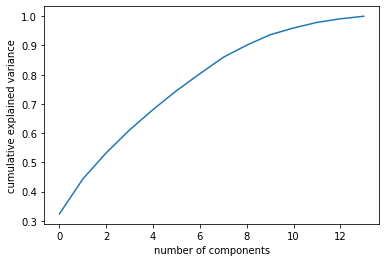

In [515]:
plt.plot(np.arange(14), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [516]:
train_feats = train_feats.iloc[: , :-4]


In [517]:
train_feats.head(5)

,LotArea,OverallRating,YearBuilt,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,Functional,Fireplaces
0,8450,6.00,2003,4,3,5,1,4,8,0
1,9600,7.00,1976,4,3,5,1,3,8,1
2,11250,6.00,2001,4,3,5,1,4,8,1
3,9550,6.00,1915,3,4,4,1,4,8,1
4,14260,6.50,2000,4,3,5,1,4,8,1


We picked these features because...


some stuff about how variance values help indicate what to drop

### Use Linear Regression

In [518]:
X = train_feats[['LotArea','OverallRating','YearBuilt','BsmtQual','BsmtCond','HeatingQC','CentralAir',
                'KitchenQual','Functional','Fireplaces']].values
y = train_df['SalePrice'].values

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [520]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [521]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-842659.7378259038
[ 1.11618510e+00  2.80544181e+04  3.61149795e+02  2.76965363e+04
 -2.18366319e+04  3.17565576e+03 -1.47579188e+04  2.72647042e+04
 -9.09204654e+02  2.65847875e+04]


In [522]:
y_pred = regressor.predict(X_test)
y_pred

array([170494.45847515, 164052.43694803, 136376.01165983, 198329.22041116,
       112210.2362343 ,  87590.96441343, 229731.9280023 , 175978.31895331,
       362354.15394421, 203290.87460664, 235481.20424582, 121801.26712187,
       234384.17225593, 130196.68334453, 163469.20235177, 114654.9029713 ,
       231213.20107397, 133642.53403456, 148506.34177706, 238293.87259242,
        81753.02230939, 215103.95759471, 145329.41313608, 185167.47410902,
       189474.80357925, 239105.22233008, 184483.90528158, 128979.81286395,
       323106.28052537,  97105.49076075, 104421.11287758, 230604.38601774,
       195938.9739366 , 252676.94659666, 280565.9781033 , 218436.8350879 ,
       315717.00733788, 105263.61125773, 234280.62270324, 302554.53675251,
       176898.85263687, 125986.29614948, 234324.28175287, 278583.37770559,
       279115.91237414,  91610.92905926, 127775.64190872, 102191.53369555,
       155106.95126137, 129732.25727342, 348695.17527333, 133679.78405222,
       177554.45410928, 1

In [525]:
train_res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
train_res['Difference'] = train_res['Actual'] - train_res['Predicted']
train_res.head(50)

,Actual,Predicted,Difference
0,200624,"170,494.46","30,129.54"
1,133000,"164,052.44","-31,052.44"
2,110000,"136,376.01","-26,376.01"
3,192000,"198,329.22","-6,329.22"
4,88000,"112,210.24","-24,210.24"
5,85000,"87,590.96","-2,590.96"
6,282922,"229,731.93","53,190.07"
7,141000,"175,978.32","-34,978.32"
8,745000,"362,354.15","382,645.85"
9,148800,"203,290.87","-54,490.87"


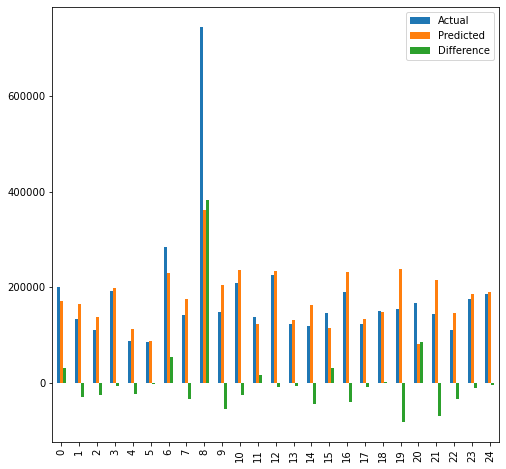

In [527]:
train_res1 = train_res.head(25)
train_res1.plot(kind='bar',figsize=(8,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [529]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 32595.540037543633
Mean Squared Error: 2450383863.644357
Root Mean Squared Error: 49501.35213955632
R-squared Error: 0.6451727337812327


## Implement again with Test Dataframe